In [2]:
from qutip import *
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
for x in np.linspace(-np.pi, np.pi, 11):
    print(np.abs(rz(x).tr()) / 2)

6.123233995736766e-17
0.30901699437494745
0.5877852522924731
0.8090169943749475
0.9510565162951535
1.0
0.9510565162951535
0.8090169943749475
0.5877852522924731
0.30901699437494745
6.123233995736766e-17


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  


In [4]:
M = 100000

In [5]:
error_samples = np.random.normal(0, np.pi / 4, M) + np.pi / 4

integrals = []

xs = np.linspace(-np.pi, np.pi, 100)

for x in xs:
    integrals.append(np.mean(np.power(np.cos(error_samples + x), 2)))

print(integrals)

[0.5010228173777449, 0.482588936436416, 0.46443520602545496, 0.4468537264628127, 0.4301273903360754, 0.41452533065483216, 0.4002985903998045, 0.3876760831473108, 0.37686090976413344, 0.3680270904385422, 0.3613167646303242, 0.3568379039936658, 0.3546625750728207, 0.35482577972443424, 0.35732489192456846, 0.3621197000224093, 0.36913305376078176, 0.37825210565266787, 0.3893301267395156, 0.4021888675151088, 0.4166214260268478, 0.43239557700561737, 0.44925750845729884, 0.46693590559276593, 0.48514631638440603, 0.5035957285057253, 0.521987284009368, 0.5400250558826152, 0.5574188096237953, 0.5738886732240627, 0.5891696404127866, 0.6030158347076472, 0.6152044656592781, 0.6255394136329949, 0.6338543854471324, 0.6400155900925877, 0.6439238914802401, 0.6455164035777347, 0.6447675022692844, 0.641689237657285, 0.636331140171656, 0.6287794236066828, 0.6191555979087935, 0.6076145140360348, 0.5943418723481902, 0.5795512346184768, 0.5634805877446696, 0.5463885144508283, 0.5285500325944702, 0.5102521700

In [6]:
print(np.pi / 4)

0.7853981633974483


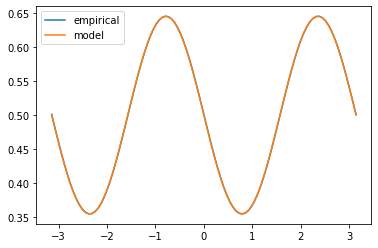

In [7]:
plt.figure()
plt.plot(xs, integrals, label="empirical")
plt.plot(xs, (1 - 2 * np.min(integrals)) * np.power(np.cos(xs + np.mean(error_samples)), 2) + np.min(integrals), label="model")
plt.legend()
plt.show()

In [19]:
M = 100000
error_samples = np.random.lognormal(0, np.pi / 4, M) - 1

integrals = []


xs = np.linspace(- np.pi, np.pi, 100)

for x in xs:
    integrals.append(np.mean(np.power(np.cos(error_samples + x), 2)))

print(integrals)
print(min(integrals))

[0.706888991351822, 0.7136447687537709, 0.7169629218510286, 0.7167900603181482, 0.7131289655619028, 0.7060385459674079, 0.6956328890401562, 0.6820794256953436, 0.6655962362317704, 0.6464485413381965, 0.624944434593177, 0.6014299251240521, 0.5762833701905646, 0.5499093872749153, 0.5227323436350121, 0.4951895280764322, 0.46772411481184695, 0.4407780326220425, 0.4147848540564064, 0.39016281908830514, 0.3673081054773485, 0.346588454120934, 0.3283372519655477, 0.3128481676859959, 0.3003704264464956, 0.2911047997744883, 0.28520037507160645, 0.28275215674157234, 0.2837995375337784, 0.2883256646992033, 0.29625771115745186, 0.3074680473117416, 0.3217762946568901, 0.3389522281369878, 0.35871948055272784, 0.38075998941309974, 0.40471911467993055, 0.43021134505885644, 0.45682650102035927, 0.4841363347419438, 0.5117014207759092, 0.5390782265692994, 0.5658262490687082, 0.5915151025793082, 0.6157314438317889, 0.638085622830292, 0.6582179524667029, 0.675804496020868, 0.6905622794236821, 0.702253844415

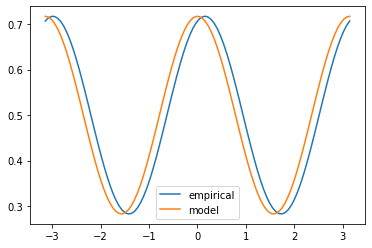

In [20]:
plt.figure()
plt.plot(xs, integrals, label="empirical")
plt.plot(xs, (1 - 2 * np.min(integrals)) * np.power(np.cos(xs), 2) + np.min(integrals), label="model")
plt.legend()
plt.show()

In [142]:
from scipy.stats import moment

print(np.mean(error_samples))

for i in range (2, 6):
    print(moment(error_samples, moment=i), moment(np.power(np.cos(error_samples), 2), moment=i))

0.36280026979320923
1.6136712915208706 0.08383350809284452
7.549685707085924 -0.024909685000145086
85.15182791924035 0.021114015391557987
1381.8976187993446 -0.011673042631848223


In [124]:
from scipy.stats import skew

In [125]:
skew(error_samples)

3.707835580965624

In [127]:
print(np.exp(np.pi **2 / 32) - 1)
print(np.mean(error_samples))

0.36127959698544054
0.362115451671189


In [130]:
(np.exp(np.pi **2 / 16) - 1) * np.exp( np.pi **2 / 16 )

1.580831280750062

In [44]:
from scipy.stats import skewnorm

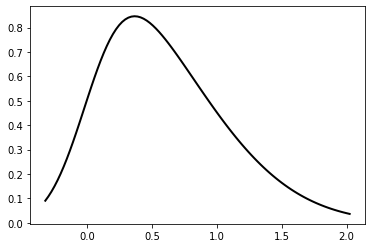

In [52]:
a = np.pi
x = np.linspace(skewnorm.ppf(0.01, a, scale=np.pi/4),
                 skewnorm.ppf(0.99, a, scale=np.pi/4), 100)
rv = skewnorm(a, scale=np.pi/4)

plt.figure()
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
plt.show()

In [101]:
error_samples = np.random.noncentral_chisquare(np.pi / 2, np.pi / 4, M)

integrals = []

xs = np.linspace(- np.pi, np.pi, 100)

for x in xs:
    integrals.append(np.mean(np.power(np.cos(error_samples + x), 2)))

print(integrals)
print(np.mean(error_samples))

[0.5491736168630994, 0.5357578255682669, 0.5217666774745137, 0.5074252953920918, 0.49296443752723806, 0.4786167844962522, 0.46461319540728063, 0.451178993250846, 0.4385303393685833, 0.4268707553363351, 0.41638784822581043, 0.40725029193657225, 0.39960511316985287, 0.3935753257138928, 0.38925795110603956, 0.3867224575198925, 0.3860096419963854, 0.3871309740041259, 0.3900684108913516, 0.39477468819895156, 0.4011740801633064, 0.4091636181721712, 0.41861474756819245, 0.4293753961414674, 0.4412724210283282, 0.4541143946448314, 0.46769468482824406, 0.4817947796258905, 0.4961878032342696, 0.5106421665156609, 0.5249252933540435, 0.538807362891865, 0.5520650074336698, 0.5644849065159347, 0.5758672193131811, 0.5860288001516641, 0.5948061453918225, 0.602058024263045, 0.6076677513196365, 0.6115450639533203, 0.6136275747523936, 0.613881775338535, 0.6123035755291568, 0.6089183691499727, 0.6037806254388365, 0.596973012615315, 0.58860506771809, 0.5788114341130006, 0.567749695030886, 0.5555978379944118

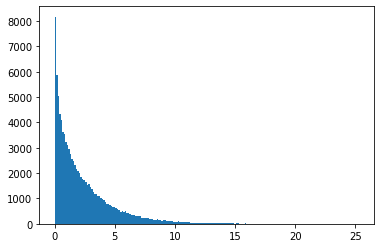

In [100]:
plt.hist(error_samples, bins=200)
plt.show()

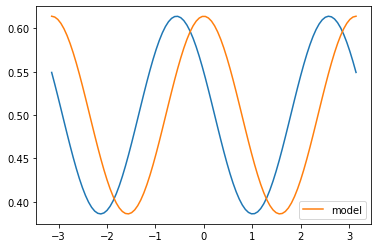

In [102]:
plt.figure()
plt.plot(xs, integrals)
plt.plot(xs, (1 - 2 * np.min(integrals)) * np.power(np.cos(xs - np.mean()), 2) + np.min(integrals), label="model")
plt.legend()
plt.show()